In [1]:
import json
import pandas as pd
import mplfinance as mpf

In [2]:
df = pd.read_pickle("./datasets/df/df_ohlcv.pkl")

In [3]:
df.columns = ["Open", "High", "Low", "Close", "Volume"]
df.head()

,Open,High,Low,Close,Volume
timestamp,,,,,
2018-09-05 08:00:00+00:00,818724.0,818724.0,818724.0,818724.0,0.01
2018-09-05 08:15:00+00:00,821250.0,821250.0,821250.0,821250.0,0.01
2018-09-05 08:45:00+00:00,819260.0,819765.0,819260.0,819765.0,0.03
2018-09-05 09:00:00+00:00,820000.0,821388.0,819500.0,819546.0,1.22
2018-09-05 09:15:00+00:00,820441.0,821530.0,819646.0,820244.0,14.77


In [4]:
pickup = df[-30:] 

In [5]:
mc = mpf.make_marketcolors(
    up="g",
    down="r",
    
)
my_style  = mpf.make_mpf_style(marketcolors=mc)

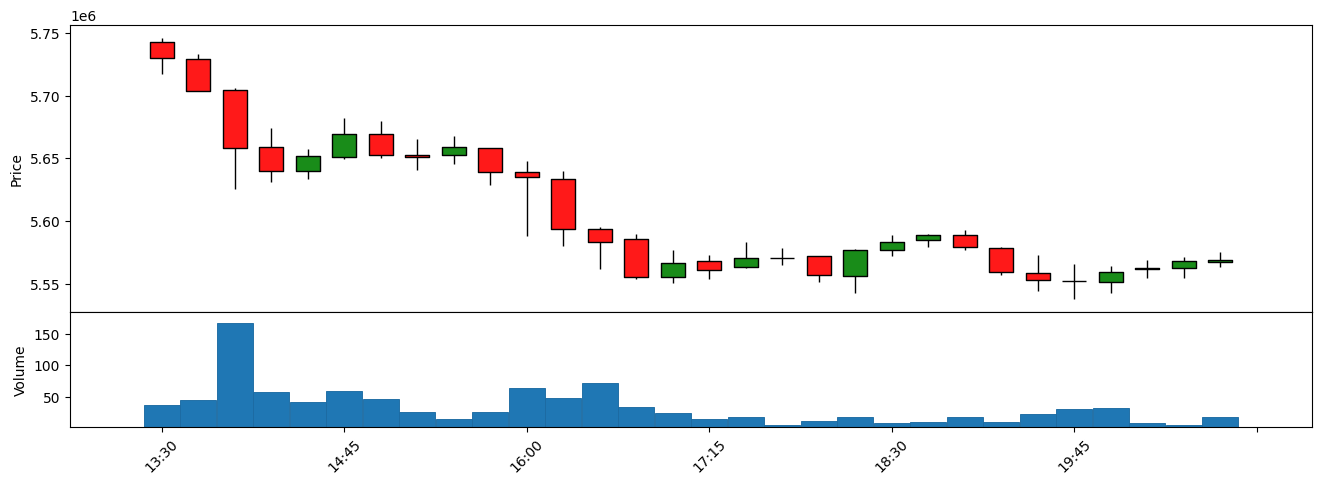

In [6]:
mpf.plot(
    pickup,
    type="candle", 
    volume=True, 
    figratio=(12, 4), 
    style=my_style
)

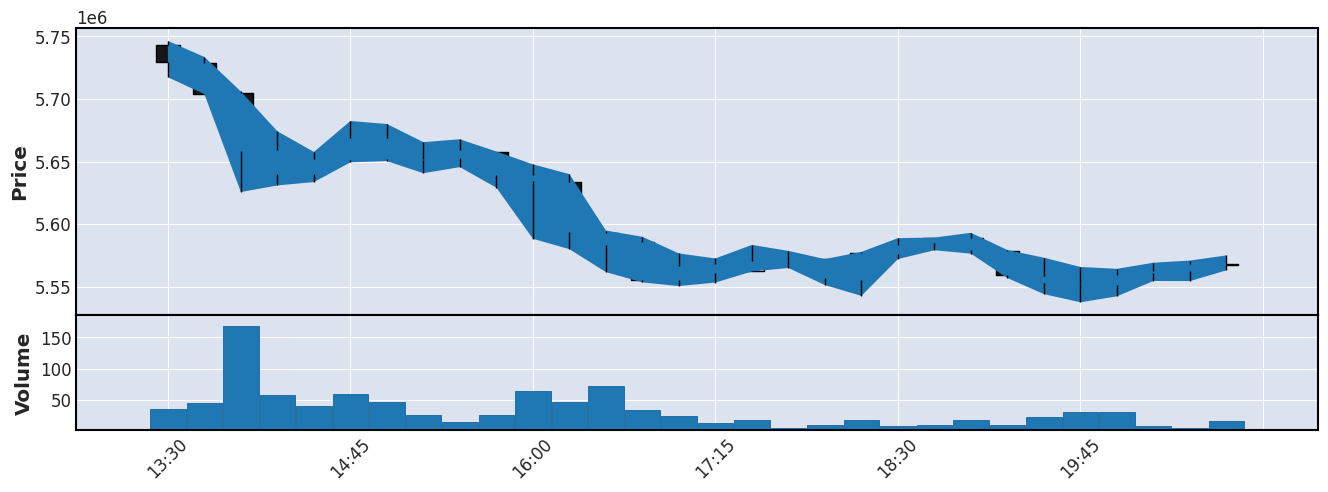

In [7]:
mpf.plot(
    pickup,
    type="candle", 
    volume=True, 
    figratio=(12, 4), 
    fill_between=dict(y1=pickup["Low"].values,y2=pickup["High"].values),
)

In [13]:
pickup_copy = df[-1000:].copy()

pickup_copy["Flag"] = (pickup_copy["Open"] - pickup_copy["Close"]) >= 0

pickup_copy.loc[pickup_copy["Flag"], "Real_Upper"] = pickup_copy["Open"]
pickup_copy.loc[pickup_copy["Flag"], "Real_Lower"] = pickup_copy["Close"]

pickup_copy.loc[~pickup_copy["Flag"], "Real_Upper"] = pickup_copy["Close"] 
pickup_copy.loc[~pickup_copy["Flag"], "Real_Lower"] = pickup_copy["Open"] 

print(len(pickup_copy))
pickup_copy.head()

1000


,Open,High,Low,Close,Volume,Flag,Real_Upper,Real_Lower
timestamp,,,,,,,,
2022-03-21 08:00:00+00:00,4905507.0,4923000.0,4901508.0,4914495.0,32.01,False,4914495.0,4905507.0
2022-03-21 08:15:00+00:00,4915000.0,4927514.0,4911522.0,4926159.0,9.35,False,4926159.0,4915000.0
2022-03-21 08:30:00+00:00,4924752.0,4924752.0,4914129.0,4921010.0,6.60,True,4924752.0,4921010.0
2022-03-21 08:45:00+00:00,4921633.0,4932990.0,4908239.0,4910097.0,15.53,True,4921633.0,4910097.0
2022-03-21 09:00:00+00:00,4910912.0,4916897.0,4901655.0,4908000.0,18.94,True,4910912.0,4908000.0


In [14]:
mc = mpf.make_marketcolors(
    up="g",
    down="r",
)
my_style  = mpf.make_mpf_style(
    gridstyle="",
    marketcolors=mc,
)

In [19]:
for i in range(1000):
    
    # 14機関の切り出し
    temp_pickup = pickup_copy.iloc[i: i+14]

    mpf.plot(
        temp_pickup,
        type="line", 
        volume=True, 
        figratio=(8, 4), 
        axisoff=True,
        style=my_style,
        fill_between=[
            dict(y1=temp_pickup["Low"].values, y2=temp_pickup["High"].values, color="r"),
            dict(y1=temp_pickup["Real_Upper"].values, y2=temp_pickup["Real_Lower"].values,color="g")
        ],
        tight_layout=True,
        savefig="./datasets/chart/{}.jpg".format(i),
    )